In [34]:
pip install pandas matplotlib seaborn scikit-learn prophet xgboost ipykernel


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
sns.set(style="whitegrid")

In [37]:
# Load the dataset (update the filename as needed)
df = pd.read_csv("../data/train.csv")
# Preview the data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [38]:
df.info()

print("\nMissing values:\n", df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


### EDA


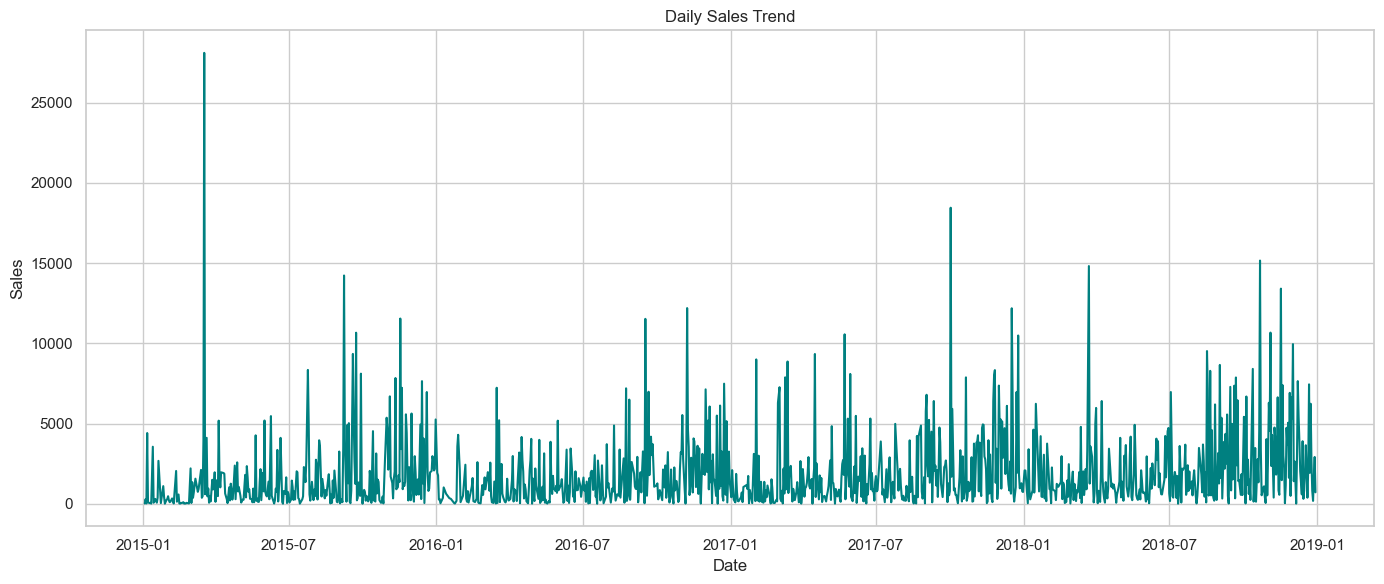

In [39]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Sort by date
df = df.sort_values('Order Date')

# Group sales by date (daily total sales)
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Daily Sales', color='teal')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_28928\2219752901.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_sales, x="Category", y="Sales", palette="viridis")


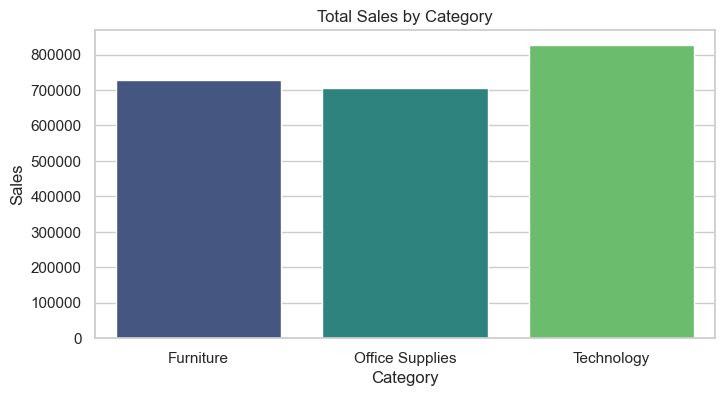

In [40]:
# Total sales by category
cat_sales = df.groupby("Category")["Sales"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=cat_sales, x="Category", y="Sales", palette="viridis")
plt.title("Total Sales by Category")
plt.show()

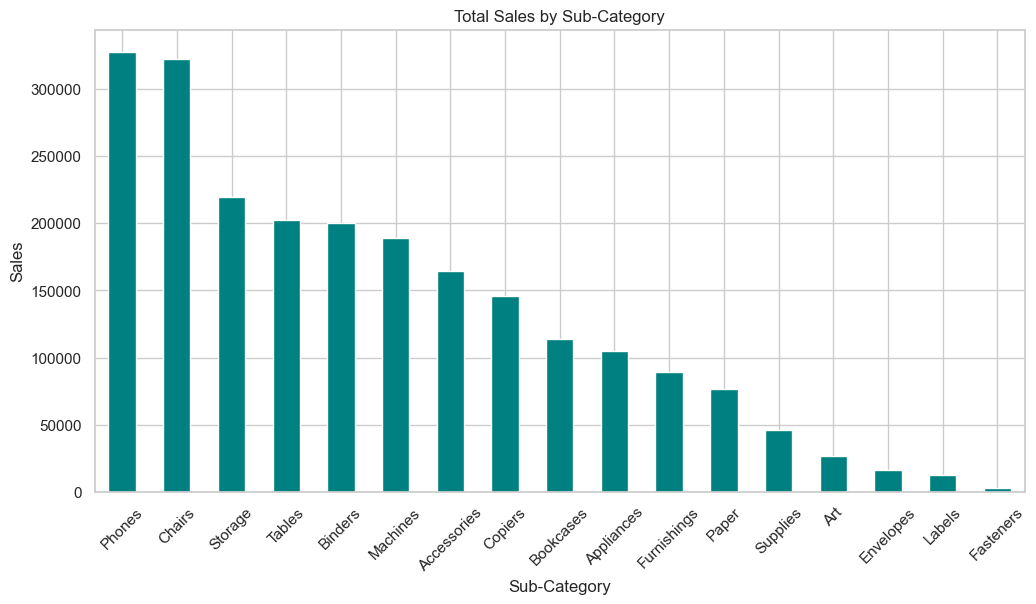

In [41]:
subcat_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
subcat_sales.plot(kind='bar', color='teal')
plt.title("Total Sales by Sub-Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_28928\968747970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x="Region", y="Sales", palette="rocket")


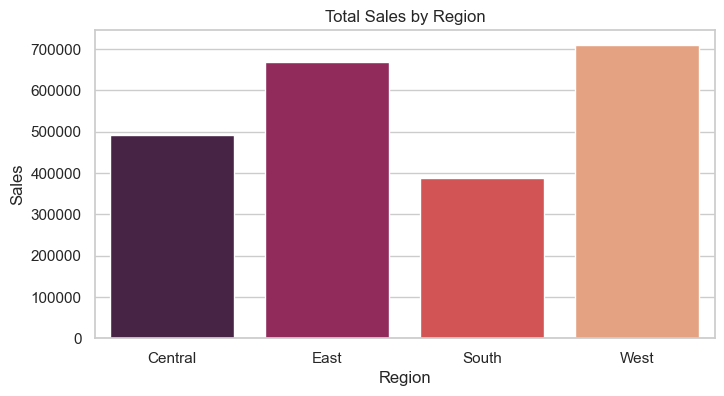

In [42]:
region_sales = df.groupby("Region")["Sales"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=region_sales, x="Region", y="Sales", palette="rocket")
plt.title("Total Sales by Region")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_28928\425366545.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_sales, x="Month", y="Sales", palette="magma")


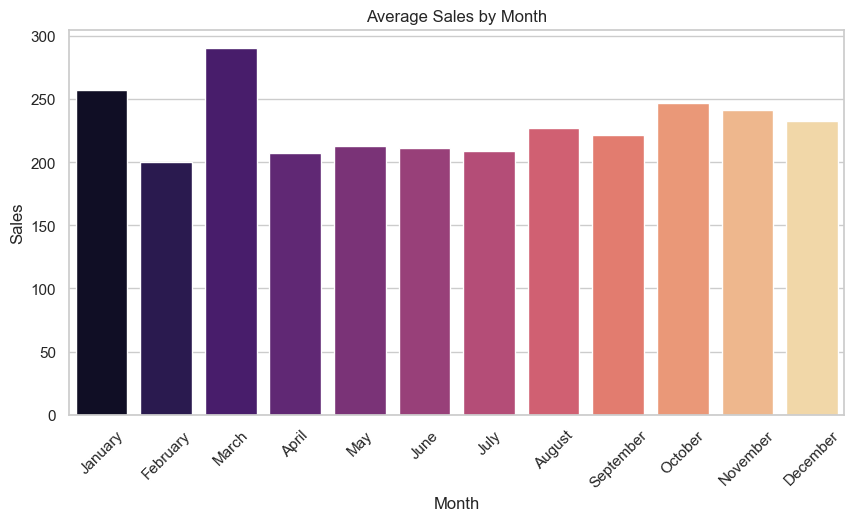

In [43]:
# Extract month from order date
df['Month'] = df['Order Date'].dt.month_name()

# Average sales by month
month_sales = df.groupby("Month")["Sales"].mean().reset_index()

month_sales['Month'] = pd.Categorical(
    month_sales['Month'],
    categories=[
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'],
    ordered=True
)
month_sales = month_sales.sort_values('Month')

plt.figure(figsize=(10,5))
sns.barplot(data=month_sales, x="Month", y="Sales", palette="magma")
plt.title("Average Sales by Month")
plt.xticks(rotation=45)
plt.show()


##### Outlier capping 

In [44]:
# Aggregate monthly sales
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum().reset_index()

# Rename columns for Prophet format
monthly_sales.rename(columns={"Order Date": "ds", "Sales": "y"}, inplace=True)

# Optional: Outlier capping (IQR method)
Q1 = monthly_sales['y'].quantile(0.25)
Q3 = monthly_sales['y'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
monthly_sales['y'] = monthly_sales['y'].apply(lambda x: min(x, upper_limit))

C:\Users\Hp\AppData\Local\Temp\ipykernel_28928\3250256076.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum().reset_index()


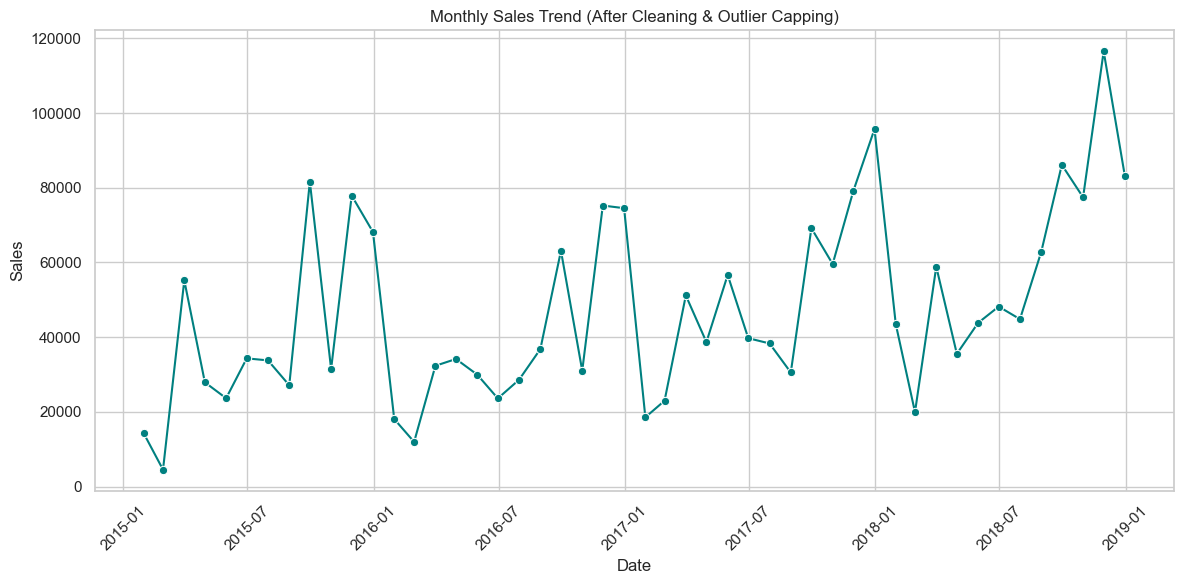

,ds,y
0,2015-01-31,14205.707
1,2015-02-28,4519.892
2,2015-03-31,55205.797
3,2015-04-30,27906.855
4,2015-05-31,23644.303


In [45]:
# Plot monthly sales trend
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='ds', y='y', marker='o', color='teal')
plt.title("Monthly Sales Trend (After Cleaning & Outlier Capping)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_sales.head()

### Fill missing months

In [46]:

monthly_sales.set_index('ds', inplace=True)
full_index = pd.date_range(start=monthly_sales.index.min(),
                           end=monthly_sales.index.max(),
                           freq='M')
monthly_sales = monthly_sales.reindex(full_index)
monthly_sales['y'] = monthly_sales['y'].fillna(0)
monthly_sales = monthly_sales.reset_index().rename(columns={'index': 'ds'})

# Remove negative sales
monthly_sales = monthly_sales[monthly_sales['y'] >= 0]


C:\Users\Hp\AppData\Local\Temp\ipykernel_28928\3674392358.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_index = pd.date_range(start=monthly_sales.index.min(),


In [47]:
# Save cleaned file
monthly_sales.to_csv("monthly_sales_cleaned.csv", index=False)